<a href="https://colab.research.google.com/github/AcerPing/AceTibaMe/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data
#((x_train,y_train),(x_test,y_test))
(x_train,y_train),(x_test,y_test) = load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


ans: 5


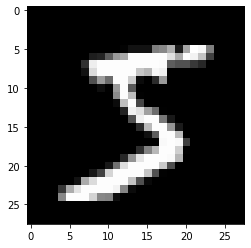

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
idx=0
print("ans:",y_train[idx])
plt.imshow(x_train[idx],cmap="gray")


In [4]:
import pandas as pd
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [#784*128+128(bias)
      Dense(128,activation="relu",input_dim=784),
      #128*10+10(bias)
      Dense(10,activation="softmax")]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
# CategoricalCrossentropy() → 與正確率差多少(類似於MSE)
# optimizer=Adam() → 步長優化
# metrics=["accuracy"] → 得知正確率多少
model.compile(loss=CategoricalCrossentropy(),
          optimizer=Adam(),
          metrics=["accuracy"])

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train,num_classes=10)
y_test_cat = to_categorical(y_test,num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
x_train_norm = x_train.reshape(-1,784)/255
x_test_norm = x_test.reshape(-1,784)/255


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
save_callback = ModelCheckpoint("mnist.h5",save_best_only=True)
stop_callback = EarlyStopping(patience=5,restore_best_weights=True)
#batch_size:看幾筆再做一次梯度(平均)下降[20-200]
#validation_split:切出一部份資料來驗證模型好壞
#epoch:整份資料要看幾輪
#verbose:2不要進度條
model.fit(x_train_norm,
      y_train_cat,
      batch_size=200,
      validation_split=0.1,
      epochs=50,
      verbose=2,
      callbacks=[stop_callback,save_callback])

Epoch 1/50
270/270 - 1s - loss: 0.4315 - accuracy: 0.8799 - val_loss: 0.1951 - val_accuracy: 0.9483
Epoch 2/50
270/270 - 1s - loss: 0.2105 - accuracy: 0.9394 - val_loss: 0.1461 - val_accuracy: 0.9603
Epoch 3/50
270/270 - 1s - loss: 0.1551 - accuracy: 0.9552 - val_loss: 0.1204 - val_accuracy: 0.9673
Epoch 4/50
270/270 - 1s - loss: 0.1217 - accuracy: 0.9652 - val_loss: 0.1067 - val_accuracy: 0.9708
Epoch 5/50
270/270 - 1s - loss: 0.0996 - accuracy: 0.9713 - val_loss: 0.0965 - val_accuracy: 0.9713
Epoch 6/50
270/270 - 1s - loss: 0.0836 - accuracy: 0.9756 - val_loss: 0.0935 - val_accuracy: 0.9723
Epoch 7/50
270/270 - 1s - loss: 0.0707 - accuracy: 0.9797 - val_loss: 0.0865 - val_accuracy: 0.9738
Epoch 8/50
270/270 - 1s - loss: 0.0597 - accuracy: 0.9831 - val_loss: 0.0816 - val_accuracy: 0.9782
Epoch 9/50
270/270 - 1s - loss: 0.0528 - accuracy: 0.9852 - val_loss: 0.0772 - val_accuracy: 0.9783
Epoch 10/50
270/270 - 1s - loss: 0.0458 - accuracy: 0.9877 - val_loss: 0.0762 - val_accuracy: 0.9785

In [10]:
model.evaluate(x_test_norm,y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0696 - accuracy: 0.9791


[0.06962596625089645, 0.9790999889373779]

In [12]:
# model.save("mlp.h5")
# HDFView
from tensorflow.keras.models import  load_model
loaded = load_model("mnist.h5")
#不需要:compile 可以:fit/evaluate/predict
loaded.evaluate(x_test_norm,y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0696 - accuracy: 0.9791


[0.06962596625089645, 0.9790999889373779]

In [15]:
#sklearn:predict(預測類別) predict_proba(預測機率)
#tensorflow: predict_classes(預測類別) predict(預測機率)
pre = model.predict_classes(x_test_norm)
pre

array([7, 2, 1, ..., 4, 5, 6])

In [18]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,pre),
      index=["{}(真實)".format(i) for i in range(10)],
      columns=["{}(預測)".format(i) for i in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),972,1,1,0,1,0,2,1,2,0
1(真實),0,1125,4,0,0,1,2,1,2,0
2(真實),5,3,1001,4,3,0,2,4,10,0
3(真實),1,0,2,992,0,6,0,3,2,4
4(真實),1,0,3,1,962,0,2,2,1,10
5(真實),2,0,0,7,1,876,2,1,2,1
6(真實),4,3,2,1,5,8,932,0,3,0
7(真實),0,3,8,2,1,0,0,1006,1,7
8(真實),2,0,2,3,2,9,2,3,948,3
9(真實),2,4,0,8,7,3,0,7,1,977


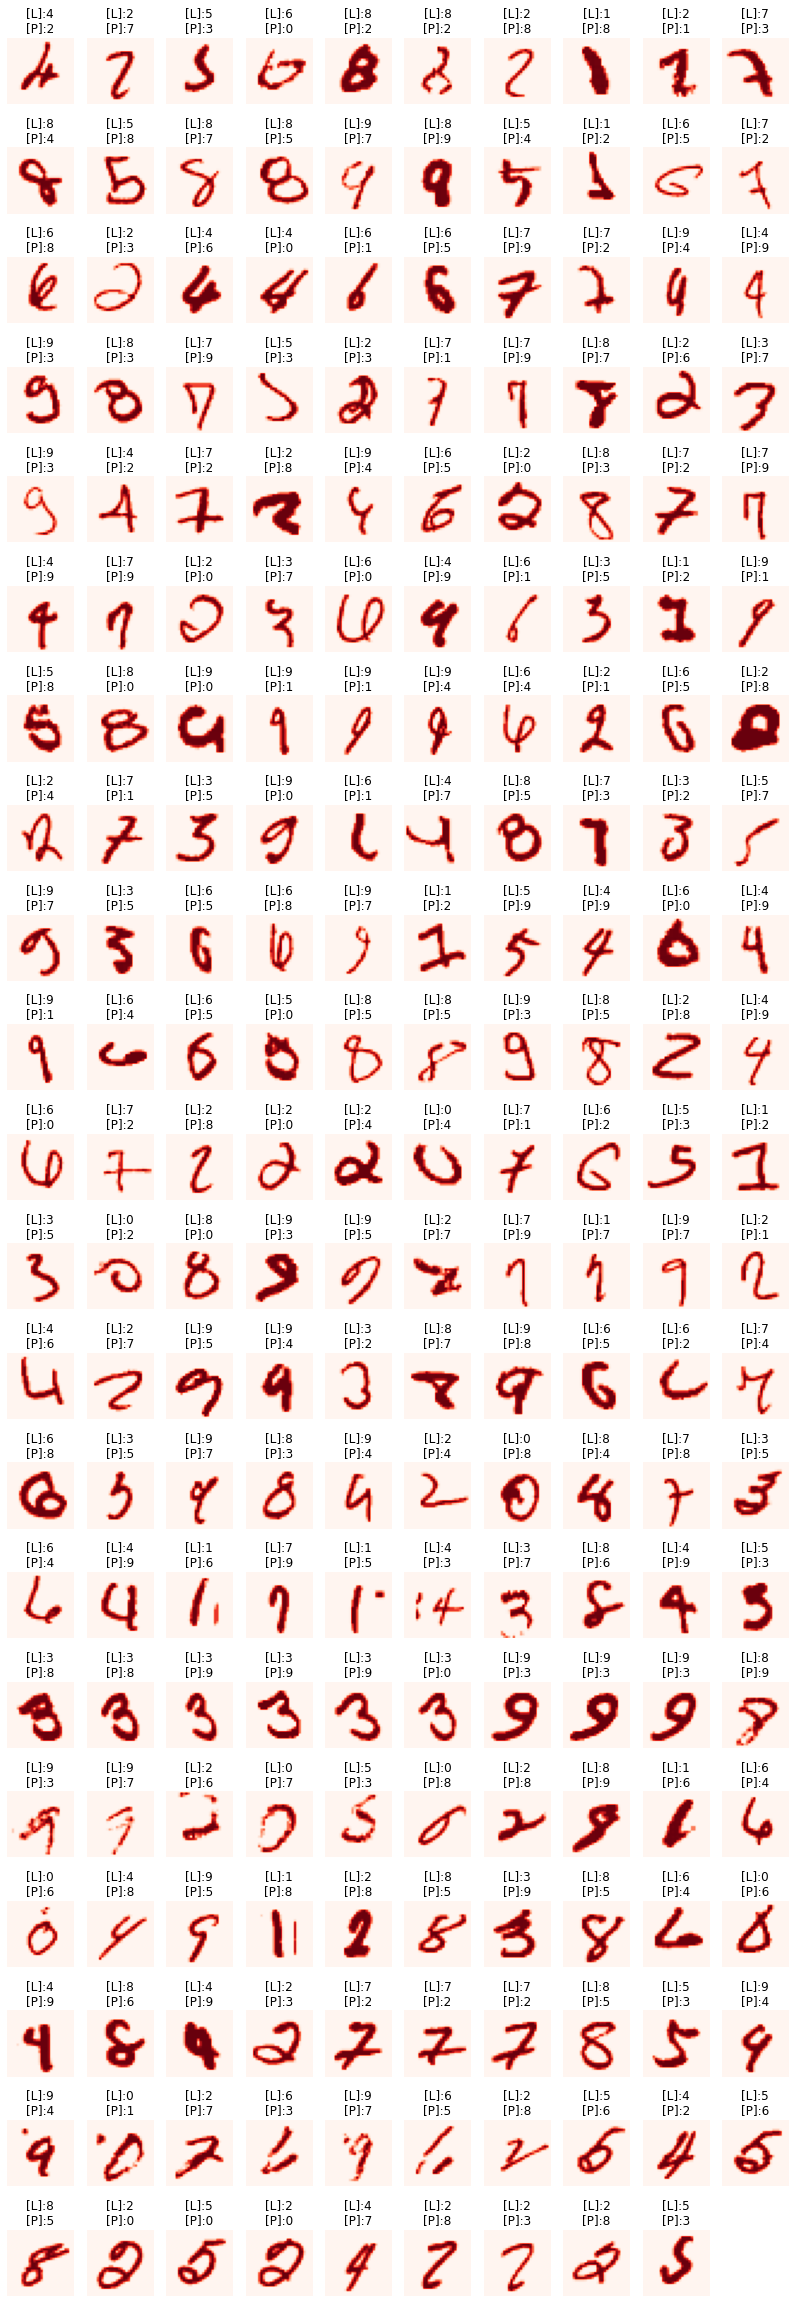

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,42))
idx = np.nonzero(pre != y_test)[0]
# false_img = x_test[idx]
# false_label = y_test[idx]
# false_pre = pre[idx]
width = 10
height = len(idx)//width+1
for i,d in enumerate(idx):
  img,label,p = x_test[d],y_test[d],pre[d]
  t = "[L]:{}\n[P]:{}".format(label,p)
  plt.subplot(height,width,i+1)
  plt.title(t)
  plt.axis("off")
  plt.imshow(img,cmap="Reds")

檔名:test.png
0 的機率: 0.0
1 的機率: 0.0
2 的機率: 0.0
3 的機率: 1.0
4 的機率: 0.0
5 的機率: 0.0
6 的機率: 0.0
7 的機率: 0.0
8 的機率: 0.0
9 的機率: 0.0


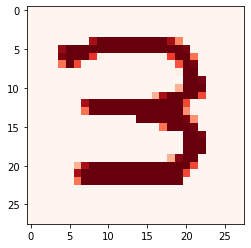

In [41]:
from tensorflow.keras.preprocessing.image import load_img
fn = input("檔名:")
img = load_img(fn,target_size=(28,28)).convert("L")
img_np = np.array(img).reshape(1,784) / 255
pre = model.predict(img_np)[0]
pre.shape
for i in range(10):
  print(i,"的機率:",round(pre[i],2))
plt.imshow(np.array(img),cmap="Reds")